In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/kriwang27/PythonProjs/main/AB_NYC_2019.csv')
data_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [20]:
data_raw.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [21]:
data_raw.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [22]:
# Drop columns we won't use

data_dropped_columns = data_raw.drop(columns=['latitude', 'longitude', 'last_review'], axis=1)
data_dropped_columns

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [26]:
# Drop rows with NA/no data in ALL columns

data_clean = data_dropped_columns.dropna(axis=0)
data_clean

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,Private room,129,1,1,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,Private room,45,1,1,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,Private room,235,1,1,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,Entire home/apt,100,1,2,2.00,1,40


In [27]:
# 

data_clean.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [36]:
# Avg Price per Borough
data_clean.groupby('neighbourhood_group', sort=False).mean()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,
Brooklyn,1.754307e+07,5.470511e+07,121.463289,5.320153,29.574427,1.283356,2.233530,105.847862
Manhattan,1.767847e+07,6.326251e+07,180.071596,7.013477,27.322423,1.271756,8.774141,109.340112
Queens,2.079463e+07,9.285907e+07,95.783683,4.222441,34.318023,1.941923,3.355424,150.554899
Staten Island,2.105923e+07,9.740580e+07,89.964968,3.420382,36.754777,1.872580,2.388535,205.640127
Bronx,2.146467e+07,1.007614e+08,79.558857,3.932571,32.381714,1.838549,2.205714,171.106286


Text(0.5, 1.0, 'Average Price per Borough')

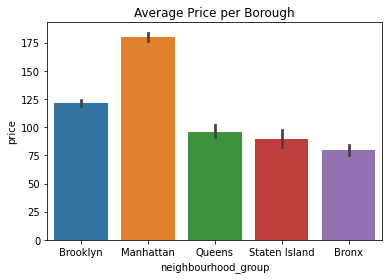

In [39]:
sns.barplot(x='neighbourhood_group', y='price', data=data_clean).set_title('Average Price per Borough')
# It is not surprising

In [41]:
# Avg price per room_type
data_clean.groupby('room_type', sort=False).mean()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,
Private room,1.874463e+07,6.917393e+07,83.985272,4.540614,30.472697,1.445075,3.030078,116.500397
Entire home/apt,1.737315e+07,5.839930e+07,196.315929,7.084691,28.534816,1.306712,7.039516,111.356134
Shared room,2.214418e+07,1.018420e+08,63.213948,4.398345,22.761229,1.471726,4.763593,165.998818


Text(0.5, 1.0, 'Average Price per Room Type')

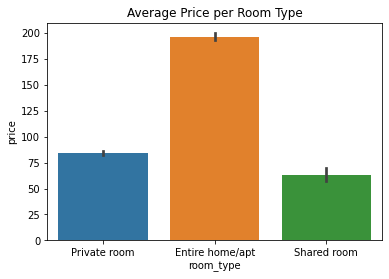

In [43]:
sns.barplot(x='room_type', y='price', data=data_clean).set_title('Average Price per Room Type')

Text(0.5, 1.0, 'Average Price per Room Type within each Borough')

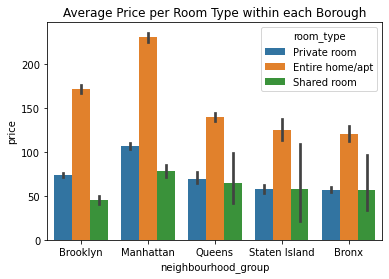

In [45]:
# Average price per room type within each borough
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=data_clean).set_title('Average Price per Room Type within each Borough')

In [51]:
# Avg price for each neighbourhood within Brooklyn and Manhattan
bk_man = ['Brooklyn','Manhattan']
data_clean.neighbourhood_group.isin(bk_man)

0         True
1         True
3         True
4         True
5         True
         ...  
48782     True
48790    False
48799    False
48805    False
48852     True
Name: neighbourhood_group, Length: 38821, dtype: bool

In [80]:
data_bk_man = data_clean[data_clean.neighbourhood_group.isin(bk_man)]
data_bk_man

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48701,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,Private room,45,1,2,2.00,1,14
48732,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Manhattan,Lower East Side,Entire home/apt,150,4,1,1.00,1,13
48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,Entire home/apt,550,3,1,1.00,1,230
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,Private room,129,1,1,1.00,1,147


In [81]:
data_bk_man_grouped = data_bk_man.groupby(['neighbourhood_group', 'neighbourhood'], sort=True).mean()
data_bk_man_grouped

id       host_id  \
neighbourhood_group neighbourhood                                    
Brooklyn            Bath Beach          2.431692e+07  1.270468e+08   
                    Bay Ridge           2.122131e+07  8.052624e+07   
                    Bedford-Stuyvesant  1.859183e+07  6.156046e+07   
                    Bensonhurst         1.894840e+07  9.150940e+07   
                    Bergen Beach        2.281780e+07  1.327607e+08   
...                                              ...           ...   
Manhattan           Two Bridges         1.940325e+07  6.917305e+07   
                    Upper East Side     1.718998e+07  5.876050e+07   
                    Upper West Side     1.563387e+07  5.442923e+07   
                    Washington Heights  1.774317e+07  6.337326e+07   
                    West Village        1.572673e+07  4.001413e+07   

                                             price  minimum_nights  \
neighbourhood_group neighbourhood                                    
Brooklyn            Bath Beach           84.800000        2.600000   
                    Bay Ridge           105.373913        9.904348   
                    Bedford-Stuyvesant  105.958930        4.975167   
                    Bensonhurst          77.213115        4.065574   
                    Bergen Beach        105.750000        3.250000   
...                                            ...             ...   
Manhattan           Two Bridges         122.216667        5.200000   
                    Upper East Side     167.303203        8.608541   
                    Upper West Side     186.612686        8.259109   
                    Washington Heights   86.981969        6.158114   
                    West Village        250.326230        6.501639   

                                        number_of_reviews  reviews_per_month  \
neighbourhood_group neighbourhood                                              
Brooklyn            Bath Beach                  24.200000           1.611333   
                    Bay Ridge                   22.765217           1.569826   
                    Bedford-Stuyvesant          35.132760           1.551901   
                    Bensonhurst                 30.245902           1.583443   
                    Bergen Beach                25.625000           1.867500   
...                                                   ...                ...   
Manhattan           Two Bridges                 35.483333           2.395500   
                    Upper East Side             22.552313           1.084456   
                    Upper West Side             24.330634           1.003556   
                    Washington Heights          23.801664           1.215950   
                    West Village                24.401639           0.944508   

                                        calculated_host_listings_count  \
neighbourhood_group neighbourhood                                        
Brooklyn            Bath Beach                                1.466667   
                    Bay Ridge                                 1.904348   
                    Bedford-Stuyvesant                        2.587393   
                    Bensonhurst                               2.065574   
                    Bergen Beach                              1.125000   
...                                                                ...   
Manhattan           Two Bridges                               1.600000   
                    Upper East Side                           6.535231   
                    Upper West Side                           4.645749   
                    Washington Heights                        2.037448   
                    West Village                              2.031148   

                                        availability_365  
neighbourhood_group neighbourhood                         
Brooklyn            Bath Beach                173.933333  
                    Bay Ridge                 1

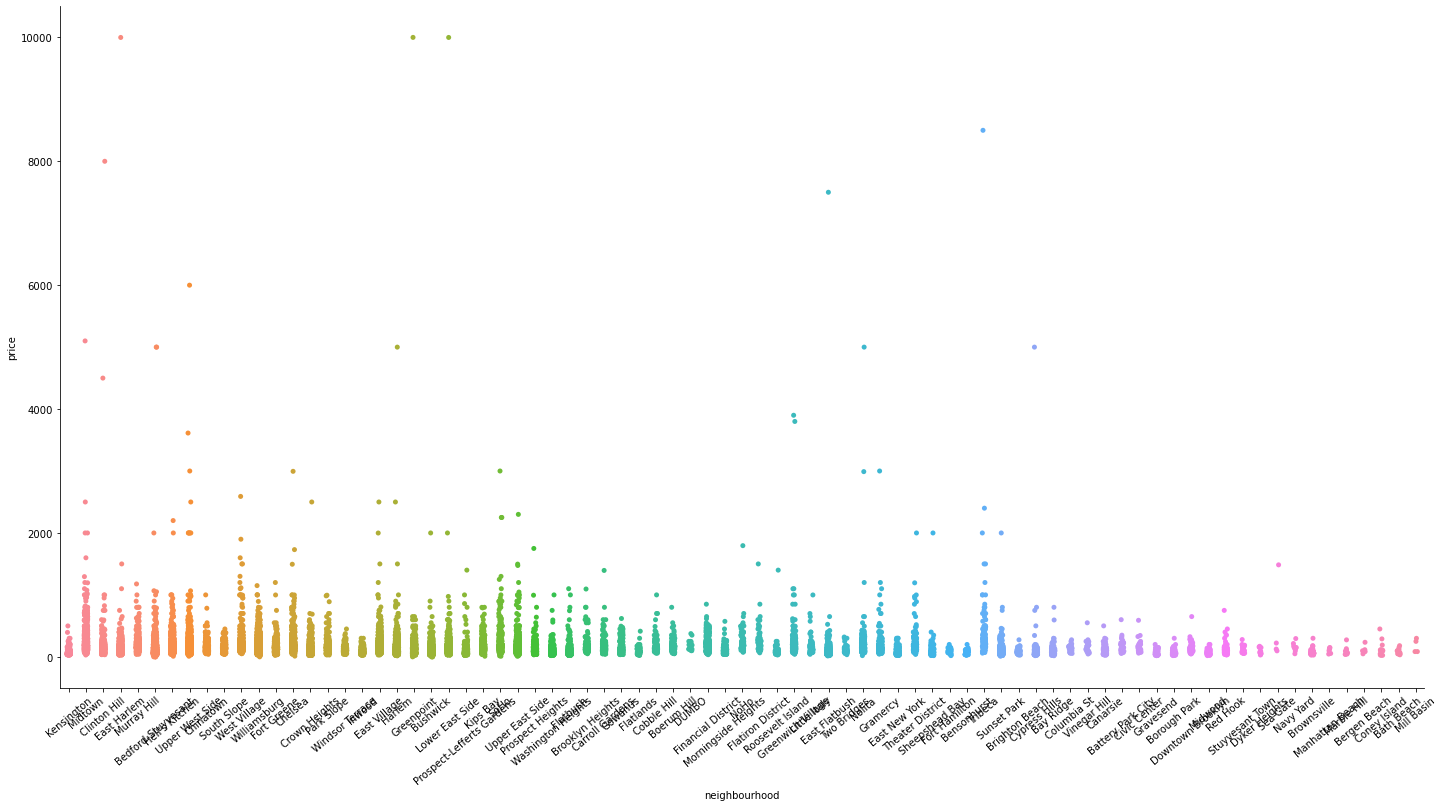

In [74]:
g=sns.catplot(x='neighbourhood', y='price', data=data_bk_man, height=10, aspect=20/10)
g.set_xticklabels(rotation=40)

In [86]:
# figure out how to get x axis to split between manhattan and brooklyn

bk = ['Brooklyn']
data_clean.neighbourhood_group.isin(bk)
data_bk = data_clean[data_clean.neighbourhood_group.isin(bk)]
data_bk

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,Private room,89,4,167,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,Entire home/apt,140,2,148,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48534,36310855,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,Private room,68,1,1,1.00,3,127
48636,36351543,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,Private room,33,30,2,2.00,1,87
48701,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,Private room,45,1,2,2.00,1,14
48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,Entire home/apt,550,3,1,1.00,1,230


In [87]:
man = ['Manhattan']
data_clean.neighbourhood_group.isin(man)
data_man = data_clean[data_clean.neighbourhood_group.isin(man)]
data_man

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48576,36318560,Luxury Sun-filled Private Room near Time Square,52917571,Linda Lou,Manhattan,Midtown,Private room,120,2,1,1.00,1,7
48601,36335990,Sunny Studio steps from Wall Street,269870940,Farina,Manhattan,Financial District,Entire home/apt,75,1,1,1.00,1,181
48634,36351128,"One bedroom without roomies, close to everything",273361532,David & Amy,Manhattan,Upper West Side,Entire home/apt,110,3,2,2.00,1,15
48732,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Manhattan,Lower East Side,Entire home/apt,150,4,1,1.00,1,13


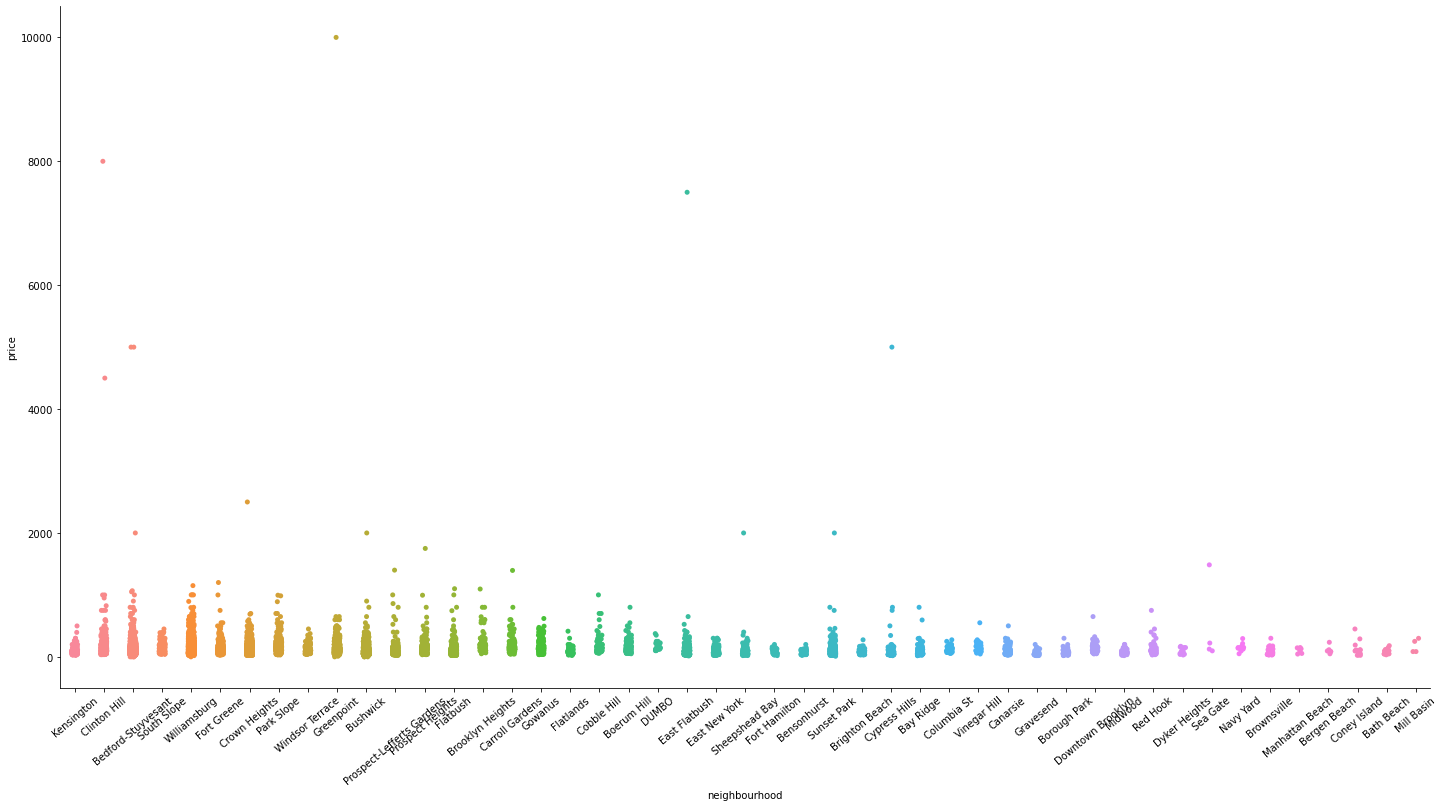

In [88]:
g=sns.catplot(x='neighbourhood', y='price', data=data_bk, height=10, aspect=20/10)
g.set_xticklabels(rotation=40) 

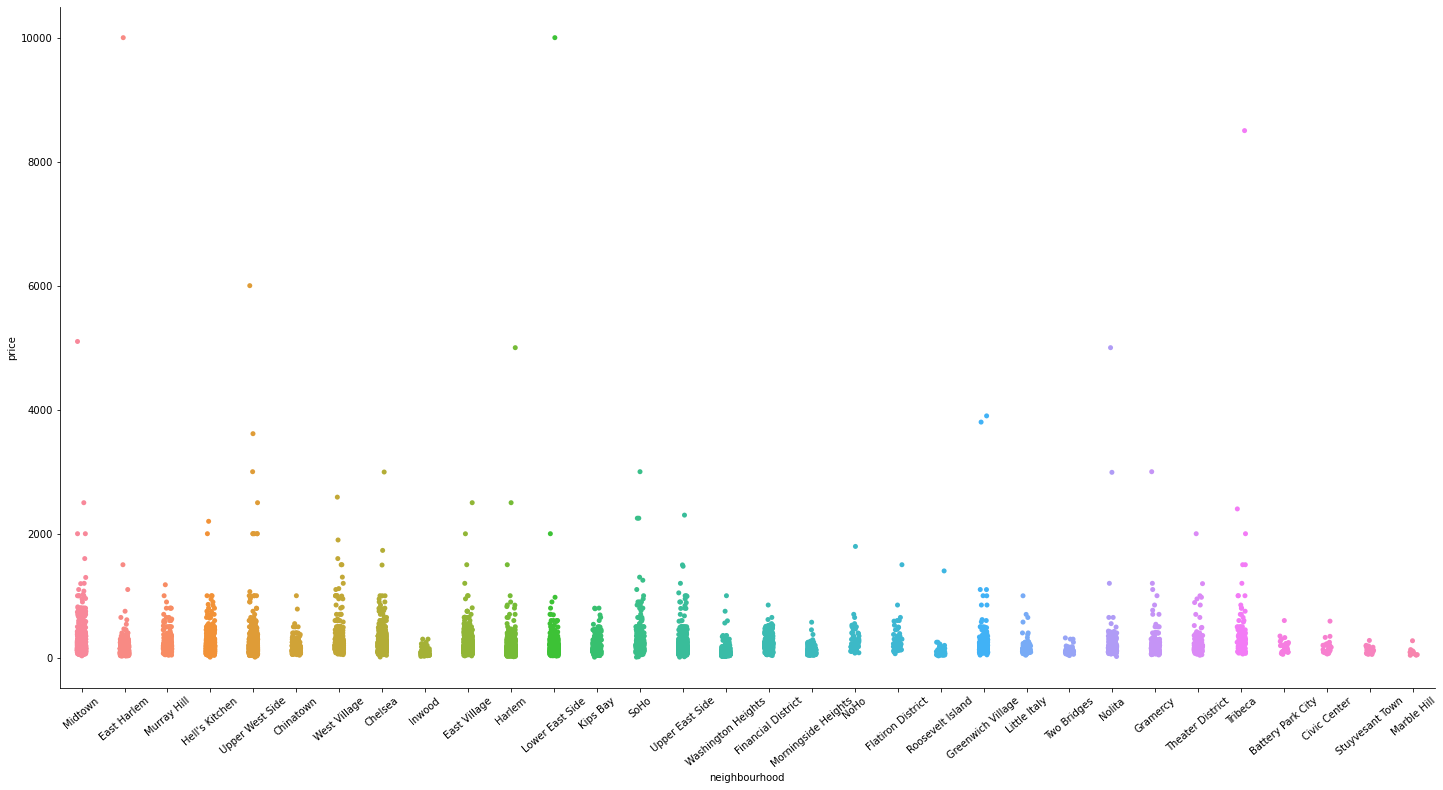

In [90]:
g=sns.catplot(x='neighbourhood', y='price', data=data_man, height=10, aspect=20/10)
g.set_xticklabels(rotation=40)

In [ ]:
# take out outliers to get a better view of the data...

In [30]:
# Avg price vs minimum_nights


In [31]:
# If a host has more listings, do their avg reviews go up? (efficiency of scale, etc.) 
# new dataframe: index the host id
